<font size = 6>Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pck
import sys 
import os
import importlib.util

# spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
# lumapi = importlib.util.module_from_spec(spec_win)
# os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
# sys.path.append(os.path.dirname('C:/Users/andre/Documents/UFCG/Photonics/Arquivos/Edge-coupler'))
# spec_win.loader.exec_module(lumapi)

spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v242\\api\\python\\lumapi.py')
lumapi = importlib.util.module_from_spec(spec_win)
os.add_dll_directory("C:/Program Files/Lumerical/v221/api/python")
sys.path.append(os.path.dirname('C:/Users/PC/Documents/Photonics/Edge-coupler'))
spec_win.loader.exec_module(lumapi)

C:\Program Files\Lumerical\v242\api\python\lumapi.py:895: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [2]:
otimiza = lumapi.MODE(filename = 'otimizacao.lms')

<font size = 6> Component Assembly

In [8]:
index_clad = 1.444
index_core = 1.482
coupler_width = 140e-9
coupler_length = 450e-6
glass_layer = 1

otimiza.switchtolayout()
otimiza.selectall()
otimiza.delete()

otimiza.addobject('linear_taper')
otimiza.set({
'name'          : 'Coupler',
'x'             : 0,
'y'             : 0,
'z'             : 0,
'thickness'     : 220e-9,
'angle_side'    : 90,
'width_l'       : 450e-9,
'width_r'       : coupler_width,
'len'           : coupler_length,
'material'      : 'Si (Silicon) - Palik'
})

otimiza.addrect()
otimiza.set({
'name'          : 'waveguide',
'x'             : -226e-6,
'x span'        : 2e-6,
'y'             : 0,
'y span'        : 450e-9,
'z'             : 0,
'z span'        : 220e-9,
'material'      : 'Si (Silicon) - Palik'
})

otimiza.addobject('cc_fiber')
otimiza.set({
'first axis'        : 'y',
'rotation 1'        : 90,
'x'                 : 228e-6,
'y'                 : 0,
'z'                 : 0,
'index cladding'    : index_clad,
'index core'        : index_core,
'radius core'       : 1.1e-6,
'radius cladding'   : 62.5e-6,
'z span'            : 5e-6,
})

if glass_layer:
    otimiza.setnamed('cc_fiber', {
        'x'         : 230.5e-6
    })

    otimiza.addeme()
    otimiza.set({
        'background material'                   : 'SiO2 (Glass) - Palik',
        'x min'                                 : -227e-6,
        'y'                                     : 0,
        'y span'                                : 20e-6,
        'z'                                     : 0,
        'z span'                                : 20e-6,
        'number of cell groups'                 : 4,
        'allow custom eigensolver settings'     : True,
        'display cells'                         : True,
        'group spans'                           : np.transpose([2e-6, 450e-6, 3e-6, 1e-6]),
        'subcell method'                        : np.transpose([0, 1, 0, 0]),
        'modes'                                 : np.transpose([10, 130, 130, 10]),
        'mesh cells y'                          : 100,
        'mesh cells z'                          : 100,
        'y min bc'                              : 'Anti-Symmetric',
        'y max bc'                              : 'PML',
        'Z min bc'                              : 'Metal',
        'Z max bc'                              : 'Metal',
    })
    otimiza.eval('setnamed("EME", "cells", [1;20;1;1]);')

    otimiza.addemeprofile()
    otimiza.set({
    'name'                      : 'profile',
    'x min'                     : -227e-6,
    'x max'                     : 225e-6,
    'y'                         : 0,
    'y span'                    : 20e-6,
    })

    otimiza.addmesh()
    otimiza.set({
    'x min'                     : -227e-6,
    'x max'                     : 225e-6,
    'y'                         : 0,
    'y span'                    : 500e-9,
    'z'                         : 0,
    'z span'                    : 250e-9,
    'set maximum mesh step'     : True,
    'override x mesh'           : False,
    'dy'                        : 0.005e-6,
    'dz'                        : 0.005e-6,        
    })
    

else:
    otimiza.setnamed('cc_fiber', {
        'enabled'           : False
    })

    otimiza.addeme()
    otimiza.set({
        'background material'                   : 'SiO2 (Glass) - Palik',
        'x min'                                 : -227e-6,
        'y'                                     : 0,
        'y span'                                : 20e-6,
        'z'                                     : 0,
        'z span'                                : 20e-6,
        'number of cell groups'                 : 2,
        'allow custom eigensolver settings'     : True,
        'display cells'                         : True,
        # 'group spans'                           : np.transpose([2e-6, 450e-6]),
        'cells'                                 : np.transpose([1, 20]),
        'subcell method'                        : np.transpose([0, 1]),
        'modes'                                 : np.transpose([10, 50]),
        'mesh cells y'                          : 100,
        'mesh cells z'                          : 100,
        'y min bc'                              : 'Anti-Symmetric',
        'y max bc'                              : 'PML',
        'Z min bc'                              : 'Metal',
        'Z max bc'                              : 'Metal',
    })
    otimiza.eval('setnamed("EME", "group spans", [2e-6;450e-6]);')
    
    otimiza.addemeprofile()
    otimiza.set({
        'name'                      : 'profile1',
        'x min'                     : -227e-6,
        'x max'                     : 225e-6,
        'y'                         : 0,
        'y span'                    : 2e-6,
        'z'                         : 0.11e-6
    })
    otimiza.addemeprofile()
    otimiza.set({
        'name'                      : 'profile2',
        'monitor type'              : '2D Y-normal',
        'x min'                     : -227e-6,
        'x max'                     : 225e-6,
        'y'                         : 0,
        'z'                         : 0,
        'z span'                    : 2e-6
    })

    otimiza.addmesh()
    otimiza.set({
        'x min'                     : -227e-6,
        'x max'                     : 225e-6,
        'y'                         : 0,
        'y span'                    : 500e-9,
        'z'                         : 0,
        'z span'                    : 250e-9,
        'set maximum mesh step'     : True,
        'override x mesh'           : False,
        'dy'                        : 0.005e-6,
        'dz'                        : 0.005e-6,        
    })
    otimiza.addemeindex()
    otimiza.set({
        'name'                      : 'index',
        'x min'                     : -227e-6,
        'x max'                     : 225e-6,
        'y'                         : 0,
        'y span'                    : 20e-6,
    })

In [7]:
otimiza.run()
otimiza.emepropagate()

<font size = 6> Mode Sweep

In [4]:
otimiza.run()
otimiza.emepropagate()

otimiza.setemeanalysis('mode convergence sweep', True)
otimiza.setemeanalysis('start mode', 1)
otimiza.setemeanalysis('mode interval', 1)
otimiza.emesweep('mode convergence sweep')

S = otimiza.getemesweep('S_mode_convergence_sweep')
x_axis = S['modes']
s11 = 10*np.log10(np.abs(S['s11'])**2)
s21 = 10*np.log10(np.abs(S['s21'])**2)

otimiza.setemeanalysis('mode convergence sweep', False)

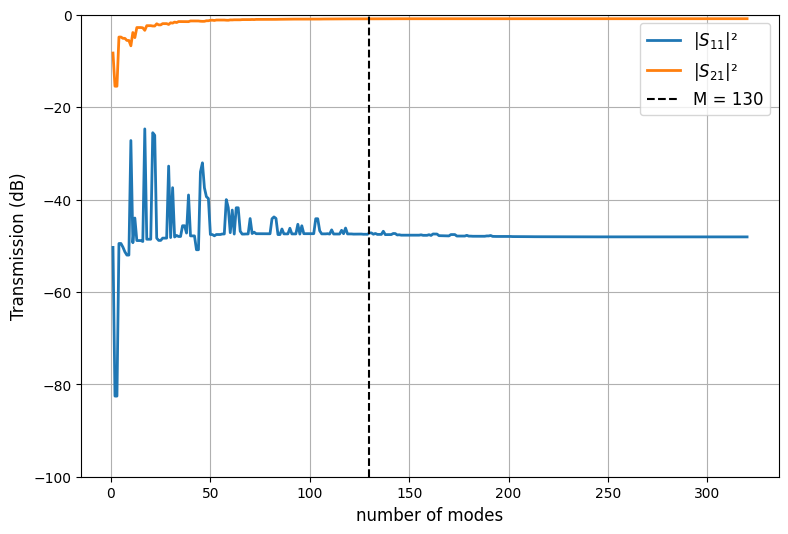

In [7]:
plt.figure(figsize = (9,6))
plt.plot(x_axis, s11, label = r'$|S_{11}|²$', linewidth = 2)
plt.plot(x_axis, s21, label = r'$|S_{21}|²$', linewidth = 2)
plt.axvline(130, ls = '--', color = 'k', label = 'M = 130')
plt.xlabel('number of modes', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.ylim(-100, 0)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid(True)

otimiza.setemeanalysis('mode convergence sweep', False)
plt.savefig('Resultados/ModeSweep')

<font size = 6>Glass Layer Width Sweep

In [5]:
otimiza.run()
otimiza.emepropagate()

otimiza.setemeanalysis('propagation sweep', True)
otimiza.setemeanalysis('parameter', 'group span 3')
otimiza.setemeanalysis('start', 0)
otimiza.setemeanalysis('stop', 6e-6)
otimiza.setemeanalysis('number of points', 200)
otimiza.emesweep()

S = otimiza.getemesweep('S')
x_axis = S['group_span_3']
s11_pos_sweep = 10*np.log10(np.abs(S['s11']**2))
s21_pos_sweep = 10*np.log10(np.abs(S['s21']**2))

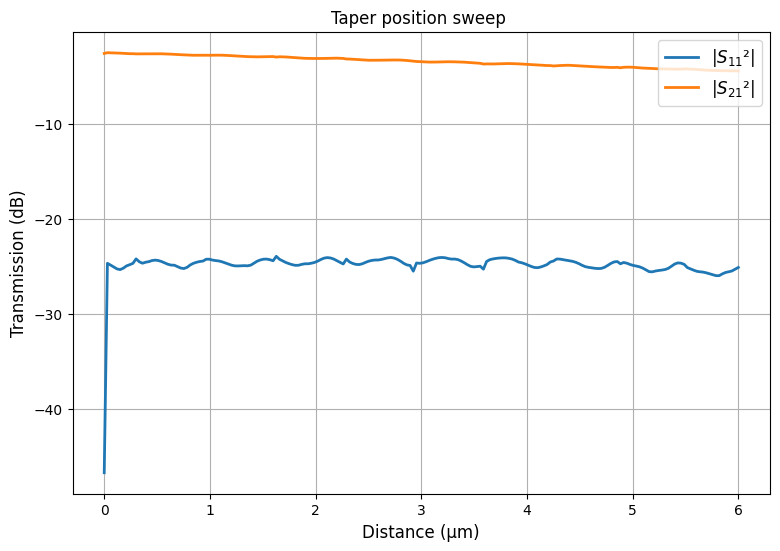

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(x_axis*1e6, s11_pos_sweep, label = r'$|S_{11}|²$', linewidth = 2)
plt.plot(x_axis*1e6, s21_pos_sweep, label = r'$|S_{21}|²$', linewidth = 2)
plt.title('Taper position sweep ', fontsize = 12)
plt.xlabel('Distance (μm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid(True)

<font size = 6>Taper Width Sweep

In [ ]:
points = 100
s11_130nm = np.zeros(points)
s21_130nm = np.zeros(points)

otimiza.switchtolayout()
otimiza.setnamed('Coupler', {
    'width_r'       : 130e-9,
})
otimiza.run()
otimiza.emepropagate()
otimiza.setemeanalysis('wavelength sweep', True)
otimiza.setemeanalysis('start wavelength', 1500e-9)
otimiza.setemeanalysis('stop wavelength', 1600e-9)
otimiza.setemeanalysis('number of wavelength points', points)
otimiza.emesweep('wavelength sweep')

S = otimiza.getemesweep('S_wavelength_sweep')
x_axis = S['wavelength']
s11_130nm = 10*np.log10(np.abs(S['s11'])**2)
s21_130nm = 10*np.log10(np.abs(S['s21'])**2)

otimiza.setemeanalysis('wavelength sweep', False)
np.savez('Taper_Width_Result_130nm', s11 = s11_130nm, s21 = s21_130nm)

In [ ]:
points = 100
s11_140nm = np.zeros(points)
s21_140nm = np.zeros(points)

otimiza.switchtolayout()
otimiza.setnamed('Coupler', {
    'width_r'       : 140e-9,
})
otimiza.run()
otimiza.emepropagate()
otimiza.setemeanalysis('wavelength sweep', True)
otimiza.setemeanalysis('start wavelength', 1500e-9)
otimiza.setemeanalysis('stop wavelength', 1600e-9)
otimiza.setemeanalysis('number of wavelength points', points)
otimiza.emesweep('wavelength sweep')

S = otimiza.getemesweep('S_wavelength_sweep')
x_axis = S['wavelength']
s11_140nm = 10*np.log10(np.abs(S['s11'])**2)
s21_140nm = 10*np.log10(np.abs(S['s21'])**2)

otimiza.setemeanalysis('wavelength sweep', False)
np.savez('Taper_Width_Result_140nm', s11 = s11_140nm, s21 = s21_140nm)

In [ ]:
points = 100
s11_150nm = np.zeros(points)
s21_150nm = np.zeros(points)

otimiza.switchtolayout()
otimiza.setnamed('Coupler', {
    'width_r'       : 150e-9,
})
otimiza.run()
otimiza.emepropagate()
otimiza.setemeanalysis('wavelength sweep', True)
otimiza.setemeanalysis('start wavelength', 1500e-9)
otimiza.setemeanalysis('stop wavelength', 1600e-9)
otimiza.setemeanalysis('number of wavelength points', points)
otimiza.emesweep('wavelength sweep')

S = otimiza.getemesweep('S_wavelength_sweep')
x_axis = S['wavelength']
s11_150nm = 10*np.log10(np.abs(S['s11'])**2)
s21_150nm = 10*np.log10(np.abs(S['s21'])**2)

otimiza.setemeanalysis('wavelength sweep', False)
np.savez('Taper_Width_Result_150nm', s11 = s11_150nm, s21 = s21_150nm)

In [ ]:
points = 100
s11_160nm = np.zeros(points)
s21_160nm = np.zeros(points)

otimiza.switchtolayout()
otimiza.setnamed('Coupler', {
    'width_r'       : 160e-9,
})
otimiza.run()
otimiza.emepropagate()
otimiza.setemeanalysis('wavelength sweep', True)
otimiza.setemeanalysis('start wavelength', 1500e-9)
otimiza.setemeanalysis('stop wavelength', 1600e-9)
otimiza.setemeanalysis('number of wavelength points', points)
otimiza.emesweep('wavelength sweep')

S = otimiza.getemesweep('S_wavelength_sweep')
x_axis = S['wavelength']
s11_160nm = 10*np.log10(np.abs(S['s11'])**2)
s21_160nm = 10*np.log10(np.abs(S['s21'])**2)

otimiza.setemeanalysis('wavelength sweep', False)
np.savez('Taper_Width_Result_160nm', s11 = s11_160nm, s21 = s21_160nm)

In [ ]:
points = 100
s11_170nm = np.zeros(points)
s21_170nm = np.zeros(points)

otimiza.switchtolayout()
otimiza.setnamed('Coupler', {
    'width_r'       : 170e-9,
})
otimiza.run()
otimiza.emepropagate()
otimiza.setemeanalysis('wavelength sweep', True)
otimiza.setemeanalysis('start wavelength', 1500e-9)
otimiza.setemeanalysis('stop wavelength', 1600e-9)
otimiza.setemeanalysis('number of wavelength points', points)
otimiza.emesweep('wavelength sweep')

S = otimiza.getemesweep('S_wavelength_sweep')
x_axis = S['wavelength']
s11_170nm = 10*np.log10(np.abs(S['s11'])**2)
s21_170nm = 10*np.log10(np.abs(S['s21'])**2)

otimiza.setemeanalysis('wavelength sweep', False)
np.savez('Taper_Width_Result_170nm', s11 = s11_170nm, s21 = s21_170nm)

auxiliar

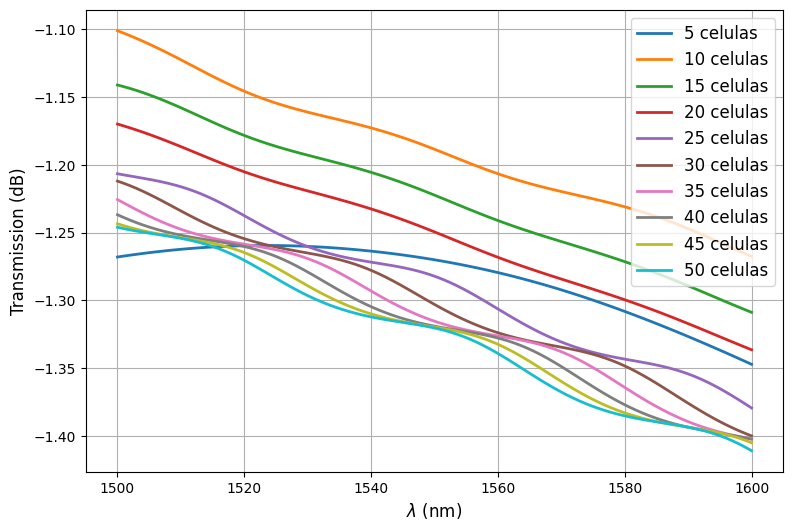

In [35]:
cells = np.arange(5, 51, 5)
s21 = np.zeros((len(cells), 100))

otimiza.switchtolayout()
otimiza.setnamed('EME', {
    'number of cell groups'     : 2,
    'group spans'               : np.transpose([2e-6, 25e-6]),
    'modes'                     : np.transpose([10, 50]),
})

for i in range(len(cells)):
    aux = cells[i]
    otimiza.switchtolayout()
    otimiza.setnamed('EME', {
        'cells'                 : np.transpose([1, aux]),
    })
    otimiza.run()
    otimiza.emepropagate()
    
    otimiza.setemeanalysis('wavelength sweep', True)
    otimiza.setemeanalysis('start wavelength', 1500e-9)
    otimiza.setemeanalysis('stop wavelength', 1600e-9)
    otimiza.setemeanalysis('number of wavelength points', 100)
    otimiza.emesweep('wavelength sweep')

    S = otimiza.getemesweep('S_wavelength_sweep')
    x_axis = S['wavelength']
    s21[i, :] = 10*np.log10(np.abs(S['s21']))

plt.figure(figsize = (9,6))
plt.plot(x_axis*1e9, s21[0, :], label = '5 celulas', linewidth = 2)
plt.plot(x_axis*1e9, s21[1, :], label = '10 celulas', linewidth = 2)
plt.plot(x_axis*1e9, s21[2, :], label = '15 celulas', linewidth = 2)
plt.plot(x_axis*1e9, s21[3, :], label = '20 celulas', linewidth = 2)
plt.plot(x_axis*1e9, s21[4, :], label = '25 celulas', linewidth = 2)
plt.plot(x_axis*1e9, s21[5, :], label = '30 celulas', linewidth = 2)
plt.plot(x_axis*1e9, s21[6, :], label = '35 celulas', linewidth = 2)
plt.plot(x_axis*1e9, s21[7, :], label = '40 celulas', linewidth = 2)
plt.plot(x_axis*1e9, s21[8, :], label = '45 celulas', linewidth = 2)
plt.plot(x_axis*1e9, s21[9, :], label = '50 celulas', linewidth = 2)

plt.xlabel(r'$\lambda$ (nm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid(True)

otimiza.setemeanalysis('wavelength sweep', False)